In [297]:
import numpy as np
from scipy import ndimage as nd
from PIL import Image, ImageDraw, ImageEnhance
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

In [298]:
# Load image1
file = 'blocks/calibrate.jpg'
file = 'blocks/white/1.jpg'
#file = 'blocks/white/2.jpg'
#file = 'blocks/white/3.jpg'
#file = 'blocks/white/4.jpg'
#file = 'blocks/white/5.jpg'

img = cv2.imread(file)
img = cv2.resize(img, dsize = (900, 1200), interpolation=cv2.INTER_CUBIC)

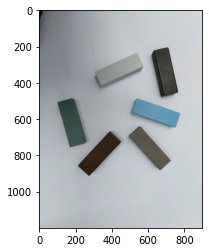

In [299]:
ksize = (2, 2)
img = cv2.blur(img, ksize)

plt.imshow(img)
plt.show()

In [300]:
print(np.shape(img))
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

#plt.hist(h)

(1200, 900, 3)


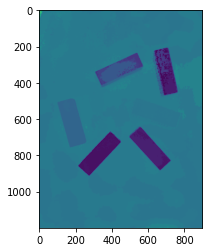

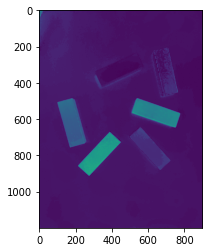

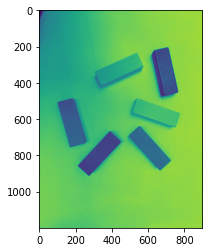

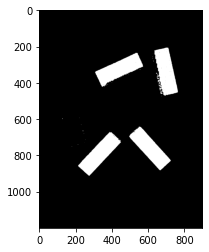

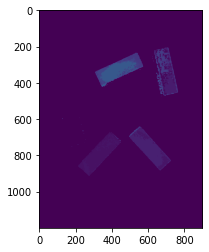

In [301]:
maskhigh = h < 80
masklow = h > 0
mask = np.multiply(masklow,maskhigh)

plt.imshow(h, vmin = 0, vmax = 255)#, cmap='gray')
plt.show()

plt.imshow(s, vmin = 0, vmax = 255)#, cmap='plasma')
plt.show()

plt.imshow(v, vmin = 0, vmax = 255)#, cmap='gray')
plt.show()

plt.imshow(mask, vmin = 0, vmax = 1, cmap='gray')
plt.show()

hthresh = np.multiply(h,mask)
plt.imshow(hthresh, vmin = 0, vmax = 255)#, cmap='plasma')
plt.show()

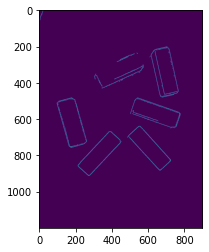

In [302]:
img = cv2.imread(file)
img = cv2.resize(img, dsize = (900, 1200), interpolation=cv2.INTER_CUBIC)

original_image = img

ksize = (9, 9)
img = cv2.blur(img, ksize)

gray= cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

edges= cv2.Canny(gray, 10, 50, 3)
plt.imshow(edges)
plt.show()

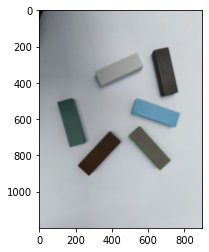

In [303]:
contours, hierarchy= cv2.findContours(edges.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

len(contours)
for i in np.arange(len(contours)):
    area = cv2.contourArea(contours[i])


sorted_contours= sorted(contours, key=cv2.contourArea, reverse= True)
cv2.drawContours(img, sorted_contours[0], -1, (0, 255, 0), 2)
plt.imshow(img)

x: 361 y: 819
152.5
x: 308 y: 774
239.5
x: 610 y: 761
391.5


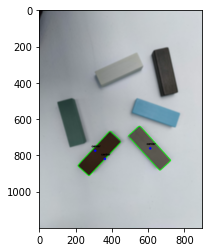

True

In [304]:
for i in contours:
    M = cv2.moments(i)
    A = cv2.contourArea(i)
    if A > 100:
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
        cv2.drawContours(img, [i], -1, (0, 255, 0), 2)
        cv2.circle(img, (cx, cy), 7, (0, 0, 255), -1)
        cv2.putText(img, "center", (cx - 20, cy - 20),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)
        print(f"x: {cx} y: {cy}")
        print(A)

plt.imshow(img)
plt.show()
cv2.imwrite("Contours.png", img)
